# Probabilidad de que UC salga campeón en fecha 28

In [61]:
import pandas as pd
import numpy as np
import matplotlib

In [62]:
total_fechas = 30
fecha_analisis = 25
partidos_x_fecha = 8
equipo_analisis = 'U.Católica (Chile)'

In [63]:
df = pd.read_csv('probs.csv', sep = ',', encoding = 'latin1')

In [64]:
df = df.iloc[:-(total_fechas-fecha_analisis)*partidos_x_fecha]

In [65]:
df.tail(3)

,LOCAL,VISITA,GL,EM,GV
197,U.Católica (Chile),Colo Colo (Chile),0.50,0.24,0.25
198,U.de Chile (Chile),Everton (Chile),0.43,0.31,0.25
199,U.de Concepción (Chile),U.La Calera (Chile),0.40,0.23,0.38


In [66]:
total_partidos = df.shape[0]
total_partidos

200

In [67]:
df_equipos = pd.read_csv('tabla_equipos_actual.csv', sep = ';', encoding = 'latin-1')
equipos = list(df_equipos['EQUIPO'])
equipos

['U.Católica (Chile)',
 'Colo Colo (Chile)',
 'Palestino (Chile)',
 'Audax Italiano (Chile)',
 "O'Higgins (Chile)",
 'Huachipato (Chile)',
 'Coquimbo Unido (Chile)',
 'U.La Calera (Chile)',
 'U.Española (Chile)',
 'Cobresal (Chile)',
 'Curicó Unido (Chile)',
 'Everton (Chile)',
 'Iquique (Chile)',
 'Antofagasta (Chile)',
 'U.de Chile (Chile)',
 'U.de Concepción (Chile)']

In [68]:
def suma_puntos(row):
    indice_local = equipos.index(row['LOCAL'])
    indice_visita = equipos.index(row['VISITA'])
    if row['r_uniform'] <= row['GL']:
        puntajes[indice_local] += 3
    elif row['r_uniform'] >= 1 - row['GV']:
        puntajes[indice_visita] += 3
    else:
        puntajes[indice_local] += 1
        puntajes[indice_visita] += 1

In [69]:
n_iter = 1000
puntajes_guardados = []
posiciones_guardadas = []
for i in range(n_iter):
    puntajes = [0] * len(equipos)
    df['r_uniform'] = np.random.uniform(low=0.0, high=1.0, size=total_partidos)
    df.apply(suma_puntos, axis=1)
    puntajes_guardados.append(puntajes)
    
    s = pd.Series(puntajes)
    posiciones = list(s.rank(method='first', ascending = False))
    posiciones_guardadas.append(posiciones)

In [70]:
puntajes_guardados_df = pd.DataFrame(puntajes_guardados, columns = equipos)

In [71]:
puntajes_guardados_df.tail(3)

,U.Católica (Chile),Colo Colo (Chile),Palestino (Chile),Audax Italiano (Chile),O'Higgins (Chile),Huachipato (Chile),Coquimbo Unido (Chile),U.La Calera (Chile),U.Española (Chile),Cobresal (Chile),Curicó Unido (Chile),Everton (Chile),Iquique (Chile),Antofagasta (Chile),U.de Chile (Chile),U.de Concepción (Chile)
997,56,42,39,40,34,36,38,36,33,31,32,26,27,24,27,23
998,59,39,42,40,37,39,38,34,32,29,32,26,27,24,24,21
999,59,42,41,37,36,36,38,36,34,31,32,27,25,24,23,21


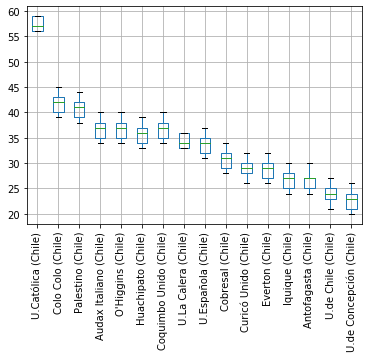

In [72]:
boxplot = puntajes_guardados_df.boxplot(rot=90)

In [73]:
puntajes_guardados_df['second_place'] = puntajes_guardados_df.apply(lambda row: row.nlargest(2).values[-1],axis=1)

In [74]:
puntajes_guardados_df.loc[puntajes_guardados_df[equipo_analisis] > puntajes_guardados_df['second_place'] + 3*(total_fechas - fecha_analisis), equipo_analisis + '_campeon'] = 1
puntajes_guardados_df.loc[puntajes_guardados_df[equipo_analisis] <= puntajes_guardados_df['second_place'] + 3*(total_fechas - fecha_analisis), equipo_analisis + '_campeon'] = 0

In [75]:
sum(puntajes_guardados_df[equipo_analisis + '_campeon'])

492.0